In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error as mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline
from sktime.forecasting.model_selection import temporal_train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from prophet import Prophet
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import make_reduction
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error as smape_loss
from sktime.forecasting.arima import AutoARIMA

In [2]:
class TimeSeriesAnalysis:
    def __init__(self, data):
        self.df = pd.read_csv(data)
        
    #def change_columns(self):
        #self.df.columns = ['ds','y']
                     
        
    def get_time_series(self, target):
    
        self.df['DATE'] = pd.to_datetime(self.df['DATE'])
        self.df.set_index('DATE', inplace=True)
        #self.df=self.df.asfreq('M')
        self.ts_df = self.df[target]
        #timestamp = pd.Timestamp('production_df')
        #timestamp.to_period(freq='M')
        
        
    
    def get_summary_stats(self):
        print(f"Mean {self.ts_df}: ", self.ts_df.mean())
        print(f"Standard Dev. {self.ts_df}: ", self.ts_df.std())
        
    def fb_prophet(self):
        model=Prophet()
        model.fit(production_df)
        future_dates=model.make_future_dataframe(periods=365)
        future_dates.tail()
        prediction=model.predict(future_dates)
        model.plot(prediction)
        prediction.head()
        
       
        
    def visualize(self, line_plot, histogram, decompose):
        sns.set()
        if line_plot:
            plt.plot(self.ts_df)
            plt.title(f"Daily {self.ts_df}")
            plt.xticks(rotation=45)
            plt.show()
        if histogram:
            self.ts_df.hist(bins=100)
            plt.title(f"Histogram of {self.ts_df}")
            plt.show()
        if decompose:
            decomposition = sm.tsa.seasonal_decompose(self.ts_df, model='additive', period =180)
            fig = decomposition.plot()
            plt.show()
            
    def stationarity_test(self):
        adft = adfuller(self.ts_df,autolag="AIC")
        kpsst = kpss(self.ts_df,autolag="AIC")

        adf_results = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

        kpss_results = pd.DataFrame({"Values":[kpsst[0],kpsst[1],kpsst[2], kpsst[3]['1%'], kpsst[3]['5%'], kpsst[3]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used",
        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

        self.adf_results = adf_results
        self.kpss_resulta = kpss_results
        
    def stationarity_test(self):
        adft = adfuller(self.ts_df,autolag="AIC")

        kpsst = kpss(self.ts_df)

        adf_results = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used",
            "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

        kpss_results = pd.DataFrame({"Values":[kpsst[0],kpsst[1],kpsst[2], kpsst[3]['1%'], kpsst[3]['5%'], kpsst[3]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used",
            "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
            
        self.adf_results = adf_results
        self.kpss_results = kpss_results
        print(self.adf_results)
        print(self.kpss_results)
        self.adf_status = adf_results['Values'].iloc[1] > adf_results['Values'].iloc[4]
        self.kpss_status = kpss_results['Values'].iloc[1] < kpss_results['Values'].iloc[3]
            
        print("ADF Results: ", self.adf_status)
        print("KPSS Results: " ,self.kpss_status)
            
   
        
    def train_test_split(self):
        self.y_train = self.ts_df[self.ts_df.index <= pd.to_datetime('2000-01')]
        self.y_test = self.ts_df[self.ts_df.index > pd.to_datetime('2000-01')]
        plt.plot(self.y_train, label='Train')
        plt.plot(self.y_test, label='Test')
        plt.show()
        
    
   
        
    def fit(self):
        self.y_train.fillna(0,inplace=True)
        model = auto_arima(self.y_train, trace=True,  error_action='ignore', suppress_warnings=True, stationary=True)
        model.fit(self.y_train)
        forecast = model.predict(n_periods=len(self.ts_df))
        self.forecast = pd.DataFrame(forecast,index = self.ts_df.index,columns=['Prediction'])

        self.ts_df = pd.DataFrame(self.ts_df, index = self.forecast.index)

        self.y_train = self.ts_df[self.ts_df.index < pd.to_datetime('2000-01')]
        
        self.y_test = self.ts_df[self.ts_df.index > pd.to_datetime('2000-01')]
       
        self.forecast = self.forecast[self.forecast.index > pd.to_datetime('2000-01')]
        
    def validate(self):
        plt.plot(self.y_train, label='Train')
        plt.plot(self.y_test, label='Test')
        plt.plot(self.forecast, label='Prediction')
        mae = np.round(mean_absolute_error(self.y_test, self.forecast), 2)
        plt.title(f'{self.ts_df} Prediction; MAE: {mae}')
        plt.xlabel('Date')
        plt.ylabel(f'{self.ts_df}')
        plt.xticks(rotation=45)
        plt.legend(loc='upper left', fontsize=8)
        plt.show()
        
        
    
   
  

    
             

In [3]:
production = TimeSeriesAnalysis(r"C:\Users\admin\Downloads\Electric_Production.csv")
production_df =production.df
production_df.columns = ['ds','y']
production_df.tail(20)


,ds,y
377,6/1/2016,104.0375
378,7/1/2016,114.5397
379,8/1/2016,115.5159
380,9/1/2016,102.7637
381,10/1/2016,91.4867
382,11/1/2016,92.8900
383,12/1/2016,112.7694
384,1/1/2017,114.8505
385,2/1/2017,99.4901
386,3/1/2017,101.0396


16:51:11 - cmdstanpy - INFO - Chain [1] start processing
16:51:11 - cmdstanpy - INFO - Chain [1] done processing


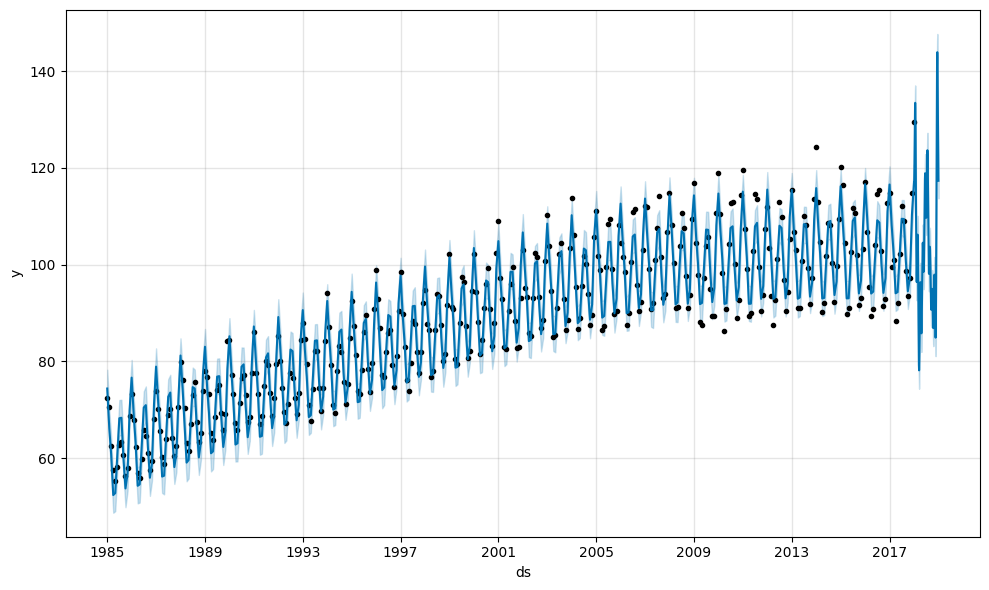

In [4]:
production = TimeSeriesAnalysis(r"C:\Users\admin\Downloads\Electric_Production.csv")
production.get_time_series('IPG2211A2N')
production.fb_prophet()







In [5]:
production = TimeSeriesAnalysis(r"C:\Users\admin\Downloads\Electric_Production.csv")
production.get_time_series('IPG2211A2N')
ts_df = production.ts_df
ts_df

DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64

In [6]:
production = TimeSeriesAnalysis(r"C:\Users\admin\Downloads\Electric_Production.csv")
production.get_time_series('IPG2211A2N')
production.stationarity_test()

       Values                       Metric
0   -2.256990              Test Statistics
1    0.186215                      p-value
2   15.000000             No. of lags used
3  381.000000  Number of observations used
4   -3.447631          critical value (1%)
5   -2.869156          critical value (5%)
6   -2.570827         critical value (10%)
      Values                Metric
0   3.531597       Test Statistics
1   0.010000               p-value
2  10.000000      No. of lags used
3   0.739000   critical value (1%)
4   0.463000   critical value (5%)
5   0.347000  critical value (10%)
ADF Results:  True
KPSS Results:  True


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


<Axes: >

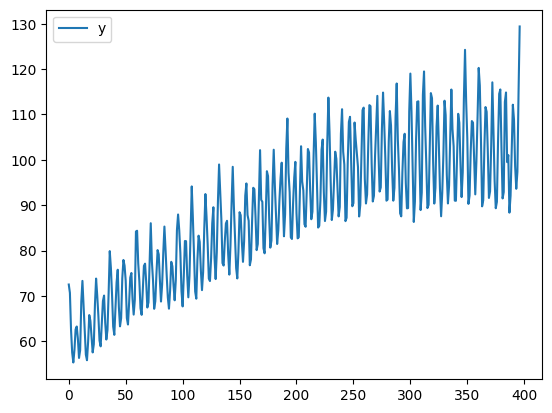

In [7]:
production_df.plot()

In [8]:
production = TimeSeriesAnalysis(r"C:\Users\admin\Downloads\Electric_Production.csv")
production.get_time_series('IPG2211A2N')
production.get_summary_stats()

Mean DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64:  88.84721763224182
Standard Dev. DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2017-09-01     98.6154
2017-10-01     93.6137
2017-11-01     97.3359
2017-12-01    114.7212
2018-01-01    129.4048
Name: IPG2211A2N, Length: 397, dtype: float64:  15.387833664730902


In [9]:
production = TimeSeriesAnalysis(r"C:\Users\admin\Downloads\Electric_Production.csv")
production.get_time_series('IPG2211A2N')
production.stationarity_test()
production.kpss_results

       Values                       Metric
0   -2.256990              Test Statistics
1    0.186215                      p-value
2   15.000000             No. of lags used
3  381.000000  Number of observations used
4   -3.447631          critical value (1%)
5   -2.869156          critical value (5%)
6   -2.570827         critical value (10%)
      Values                Metric
0   3.531597       Test Statistics
1   0.010000               p-value
2  10.000000      No. of lags used
3   0.739000   critical value (1%)
4   0.463000   critical value (5%)
5   0.347000  critical value (10%)
ADF Results:  True
KPSS Results:  True


C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


,Values,Metric
0,3.531597,Test Statistics
1,0.010000,p-value
2,10.000000,No. of lags used
3,0.739000,critical value (1%)
4,0.463000,critical value (5%)
5,0.347000,critical value (10%)


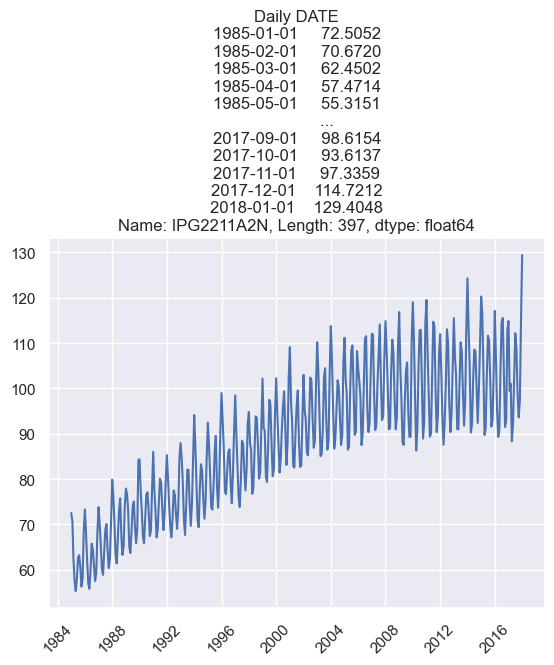

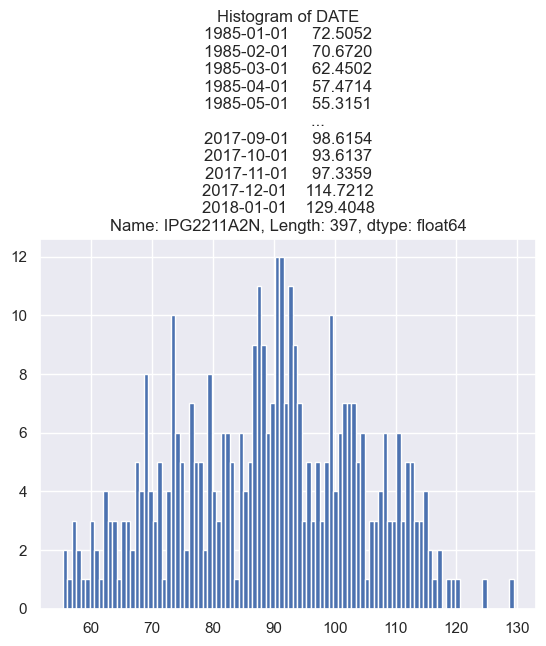

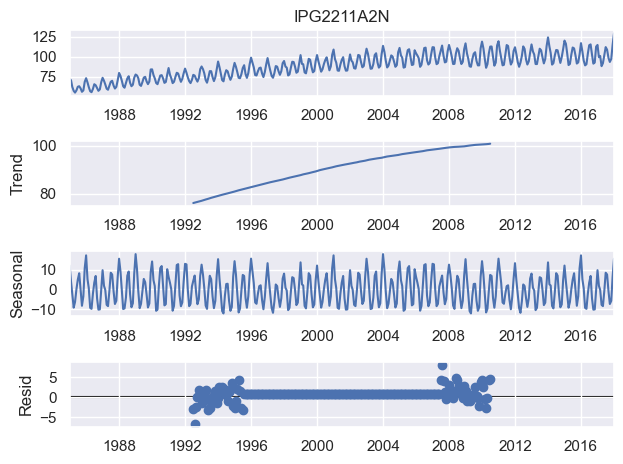

In [10]:
production = TimeSeriesAnalysis(r"C:\Users\admin\Downloads\Electric_Production.csv")
production.get_time_series('IPG2211A2N')
production.visualize(line_plot = True, histogram = True, decompose = True)

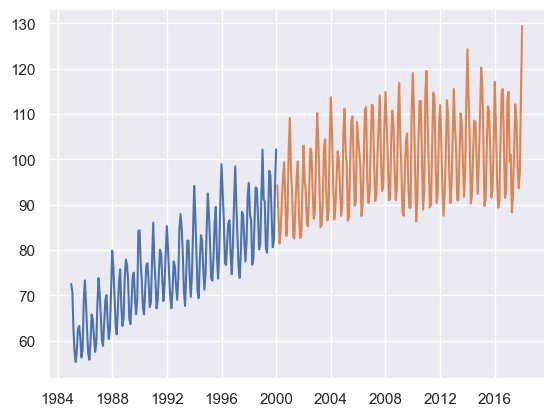

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1069.950, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1364.140, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1158.318, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1195.851, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2087.122, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1071.521, Time=0.67 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1082.425, Time=0.60 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1060.691, Time=1.39 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1049.419, Time=1.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=1072.512, Time=0.40 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=1044.591, Time=1.08 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=1058.909, Time=0.46 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(1,0,5)(0,0,0)[0] intercept   : AIC=1

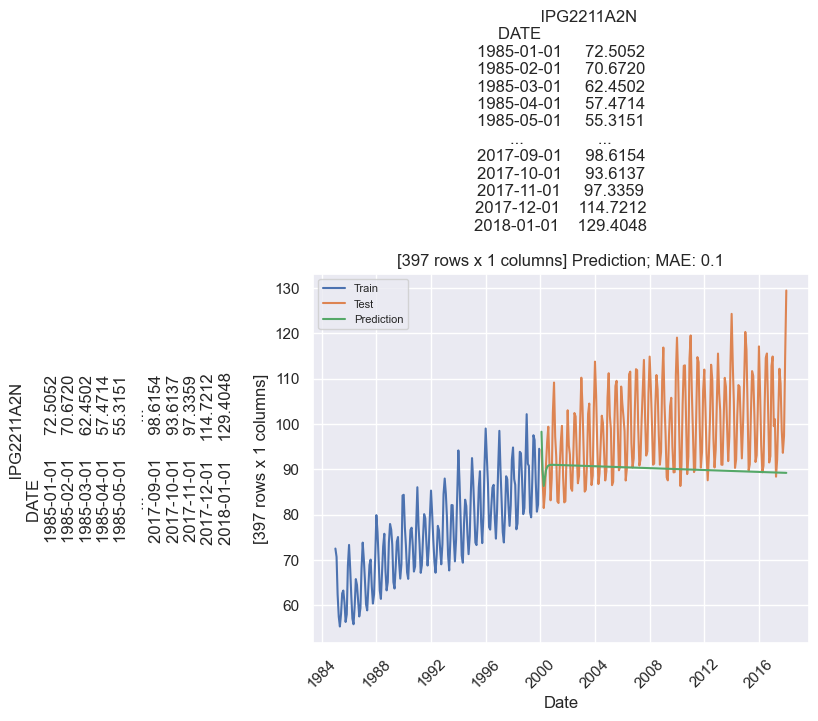

In [11]:
production = TimeSeriesAnalysis(r"C:\Users\admin\Downloads\Electric_Production.csv")
production.get_time_series('IPG2211A2N')
production.train_test_split()
production.fit()
production.validate()